## Statistics Case Study
###### Presented by Avni Shah

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import researchpy as rp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\VIREN ( RELIANCE )\OneDrive\Desktop\Covid Vaccination Survey.csv")

In [3]:
df[0:5].style.set_properties(**{'text-align': 'left'})

,Timestamp,Name,Gender,Age,Occupation,Awareness about COVID,Contraction of virus before vaccination,No. of people in personal contact that contracted virus before vaccination,Are the vaccines safe?,Most effective vaccine,Have they and/or their family been vaccinated,Vaccine taken by them,Did they face any side effects after vaccination,Side effects faced by them,Easy avilability of vaccines,Contraction of virus after vaccination,No. of people in personal contact that contracted virus after vaccination,Effectiveness of vaccines on a scale of 1 to 5,Are the vaccines being distributed properly?
0,2021/05/03 10:10:14 PM GMT+5:30,Hannan,Male,18 - 30,Student,4,Yes,40,Maybe,Pfizer,Yes,Covishield,Yes,Weakness,Yes,No,1,4,No
1,2021/05/03 10:15:03 PM GMT+5:30,Viren,Male,30 - 60,Self Employed,5,Yes,20,Yes,Sputnik V,Yes,Covishield,No,No,Yes,No,0,3,No
2,2021/05/03 10:20:31 PM GMT+5:30,Ketna Master,Female,30 - 60,Self Employed,3,Yes,15,Maybe,Covaxin,Yes,Covishield,Yes,Fever and weakness,Yes,No,0,3,Yes
3,2021/05/03 10:22:58 PM GMT+5:30,Shaikh Insha,Female,18 - 30,Student,4,No,0,No,Pfizer,No,Other,No,nan,No,No,0,2,Maybe
4,2021/05/03 10:26:12 PM GMT+5:30,Archana Shah,Female,30 - 60,Housewife,4,Yes,25,Maybe,Covishield,Yes,Covishield,No,nan,Yes,No,1,4,Maybe


### Univariate & Multivariate Analysis

In [4]:
df.describe().style.set_properties(**{'text-align': 'left'})

,Awareness about COVID,No. of people in personal contact that contracted virus before vaccination,No. of people in personal contact that contracted virus after vaccination,Effectiveness of vaccines on a scale of 1 to 5
count,120.000000,120.000000,120.000000,120.000000
mean,4.283333,19.008333,2.825000,3.550000
std,0.746795,32.920708,13.974564,1.215101
min,3.000000,0.000000,0.000000,1.000000
25%,4.000000,3.000000,0.000000,3.000000
50%,4.000000,9.500000,0.000000,4.000000
75%,5.000000,20.000000,2.000000,5.000000
max,5.000000,250.000000,150.000000,5.000000


In [5]:
#Analysis of no. of infected people before and after being vaccinated
df['No. of people in personal contact that contracted virus before vaccination'].describe()

count    120.000000
mean      19.008333
std       32.920708
min        0.000000
25%        3.000000
50%        9.500000
75%       20.000000
max      250.000000
Name: No. of people in personal contact that contracted virus before vaccination, dtype: float64

In [6]:
df['No. of people in personal contact that contracted virus after vaccination'].describe()

count    120.000000
mean       2.825000
std       13.974564
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      150.000000
Name: No. of people in personal contact that contracted virus after vaccination, dtype: float64

<AxesSubplot:>

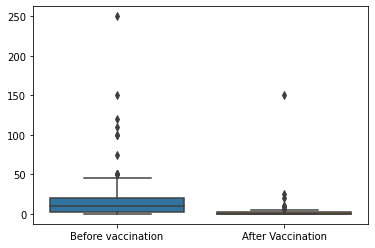

In [7]:
data = pd.DataFrame()
data['Before vaccination'] = df['No. of people in personal contact that contracted virus before vaccination']
data['After Vaccination'] = df['No. of people in personal contact that contracted virus after vaccination']

sns.boxplot(data = data)

<AxesSubplot:>

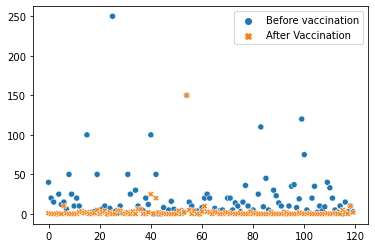

In [8]:
sns.scatterplot(data = data)

### Data Visualization

In [9]:
#Relation between views on effectiveness of vaccines with gender and age
pd.pivot_table(data = df, index = ['Gender', 'Age'], values = ['Effectiveness of vaccines on a scale of 1 to 5'])

Effectiveness of vaccines on a scale of 1 to 5
Gender Age                                                     
Female 18 - 30                                         3.560000
       30 - 60                                         3.225806
       Above 60                                        3.166667
Male   18 - 30                                         3.285714
       30 - 60                                         4.192308
       Above 60                                        5.000000
       Below 18                                        3.500000

<AxesSubplot:xlabel='Gender', ylabel='Effectiveness of vaccines on a scale of 1 to 5'>

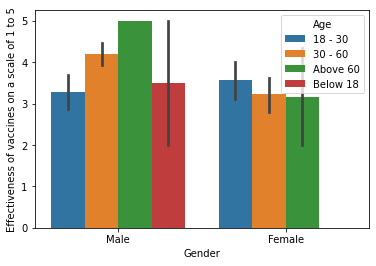

In [10]:
sns.barplot(x = 'Gender', y = 'Effectiveness of vaccines on a scale of 1 to 5', hue = 'Age', data = df)

In [11]:
#Relation between no. of infected people in contact and age
pd.pivot_table(data = df, index = ['Age'], values = ['No. of people in personal contact that contracted virus before vaccination'])

,No. of people in personal contact that contracted virus before vaccination
Age,
18 - 30,16.150943
30 - 60,18.298246
Above 60,45.500000
Below 18,9.000000


<AxesSubplot:xlabel='No. of people in personal contact that contracted virus before vaccination', ylabel='Count'>

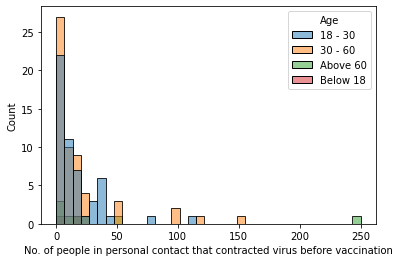

In [12]:
sns.histplot(x = 'No. of people in personal contact that contracted virus before vaccination', hue = 'Age', data = df)

### Paired Sample T - Test

In [13]:
#Hypothesis
#H0 : There is no significant difference in the number of cases before and after vaccination.
#V/S
#H1 : There is significant difference in the number of cases before and after vaccination.

In [14]:
from scipy.stats import ttest_rel

In [15]:
a = df["No. of people in personal contact that contracted virus before vaccination"]
b = df["No. of people in personal contact that contracted virus after vaccination"]

In [16]:
ttest_rel(a,b)

Ttest_relResult(statistic=5.850187085023075, pvalue=4.416014775131506e-08)

In [17]:
#pvalue(0.0000000441) < alpha(0.05)
#Thus, we reject H0.

#### Hence, there is significant different in the number of cases before and after vaccination.
###### *The number of cases has greatly decreased after taking vaccines.*

### Two Sample T - Test

In [18]:
from scipy.stats import ttest_ind

In [19]:
#Hypotheis
#H0 : There is no significant difference in the awareness about COVID between men and women.
#V/S
#H1 : There is significant difference in the awareness about COVID between men and women.

In [20]:
df.groupby('Gender')['Awareness about COVID'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,62.0,4.258065,0.766843,3.0,4.0,4.0,5.0,5.0
Male,58.0,4.310345,0.730462,3.0,4.0,4.0,5.0,5.0


In [21]:
Male = df[(df['Gender'] == 'Male')]
Male.reset_index(inplace = True)

Female = df[(df['Gender'] == 'Female')]
Female.reset_index(inplace = True)

In [22]:
scipy.stats.ttest_ind(Male['Awareness about COVID'],Female['Awareness about COVID'])

Ttest_indResult(statistic=0.3818488979401267, pvalue=0.7032602262059726)

In [23]:
#pvalue(0.7) > alpha(0.05)
#Thus, we do not reject H0.

#### There is no significant difference in the awareness about COVID between men and women.
###### *Both men and women are almost equally aware about COVID 19.*

### Chi Square Test of Independence or Association

In [24]:
#1. Hypotheses
#H0 : There is no relationship between age and views on most effective vaccine(Independent)
#VS
#H1 : There is a relationship between age and views on most effective vaccine(Dependent)

In [25]:
rp.crosstab(df['Age'],df['Most effective vaccine'],test = 'chi-square')

(                       Most effective vaccine                                 
 Most effective vaccine                Covaxin Covishield Pfizer Sputnik V  All
 Age                                                                           
 18 - 30                                     7         15     26         5   53
 30 - 60                                    12         27     12         6   57
 Above 60                                    0          6      2         0    8
 Below 18                                    0          0      2         0    2
 All                                        19         48     42        11  120,
                 Chi-square test  results
 0  Pearson Chi-square ( 9.0) =   18.4704
 1                    p-value =    0.0301
 2                 Cramer's V =    0.2265)

In [26]:
#pvalue(0.03) < alpha(0.05)
#Thus, we reject H0.

#### Thus, there is a relationship between age and views on most effective vaccine.
###### *Younger people lean towards Pfizer whereas older people prefer Covishield.*

In [27]:
#Hypotheses
#H0 : There is no relationship between gender and views on most effective vaccine(Independent)
#VS
#H1 : There is a relationship between gender and views on most effective vaccine(Dependent)

In [28]:
rp.crosstab(df['Gender'],df['Most effective vaccine'],test = 'chi-square')

(                       Most effective vaccine                                 
 Most effective vaccine                Covaxin Covishield Pfizer Sputnik V  All
 Gender                                                                        
 Female                                      8         27     22         5   62
 Male                                       11         21     20         6   58
 All                                        19         48     42        11  120,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    1.2779
 1                    p-value =    0.7344
 2                 Cramer's V =    0.1032)

In [29]:
#pvalue(0.73) < alpha(0.05)
#Thus, we do not reject H0.

#### Thus, there is no significant relationship between gender and views on most effective vaccine.
###### *Both men and women are leaning towards the same vaccine.*

### Chi Square Test of Homogeneity

In [30]:
#Hypotheses
#H0 : There is no relationship between vaccine taken and contraction of virus in family after vaccination(Independent)
#VS
#H1 : There is a relationship between vaccine taken and contraction of virus in family after vaccination(Dependent)

In [31]:
rp.crosstab(df['Vaccine taken by them'],df['Contraction of virus after vaccination'],test = 'chi-square')

(                                       Contraction of virus after vaccination  \
 Contraction of virus after vaccination                                     No   
 Vaccine taken by them                                                           
 Covaxin                                                                     9   
 Covishield                                                                 85   
 Other                                                                      16   
 All                                                                       110   
 
                                                  
 Contraction of virus after vaccination Yes  All  
 Vaccine taken by them                            
 Covaxin                                  0    9  
 Covishield                               5   90  
 Other                                    5   21  
 All                                     10  120  ,
                 Chi-square test  results
 0  Pearson Chi-square (

In [32]:
#pvalue(0.01) < alpha(0.05)
#Thus, we reject H0.

#### Hence, there is a relationship between vaccine taken and contraction of virus in family after vaccination.
###### *People taking Covaxin are less likely to contract the virus.*

### F - Test

In [33]:
def f_test(x,y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof = 1)/np.var(y, ddof = 1)
    dfx = x.size - 1
    dfy = y.size - 1
    p = 1 - scipy.stats.f.cdf(f,dfx,dfy)
    return f,p

In [34]:
#Hypotheses
#H0 : There is no significant relationship between vaccine taken and views of people on effectiveness of vaccines(Independent)
#VS
#H1 : There is a significant relationship between vaccine taken and views of people on effectiveness of vaccines(Dependent)

In [35]:
Covishield = df[(df['Vaccine taken by them'] == 'Covishield')]
Covaxin = df[(df['Vaccine taken by them'] == 'Covaxin')]

In [36]:
f_test(Covishield['Effectiveness of vaccines on a scale of 1 to 5'],Covaxin['Effectiveness of vaccines on a scale of 1 to 5'])

(1.7171868497711194, 0.21006604704320597)

In [37]:
# pvalue(0.36) > alpha(0.05)
#Thus, we do not reject H0.

#### There is no significant relationship between vaccine taken(Covishield and Covaxin) and views of people on effectiveness of vaccines.
###### *People's views aren't affected by the vaccine they and/or their family has taken.*